# Pymaceuticals Inc.
---

### Analysis

-Capomulin and Ramicane outperformed the other drugs as they have the lowest mean and median tumor volumes. 
-For Capolmulin, the low variance and standard deviation indicate that the tumor volumes are relatively consistent and close to the mean. The standard error is relatively small, indicating that the estimate of the mean is precise.
-Capomulin and Ramicane had the most timepoints. 
-There is a strong positive correlation between mouse weight and average tumor volume. Heavier mice tend to have larger tumor volume and changes in mouse weight are associated with significant and consistent changes in tumor volume. 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
merged_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
num_mice = merged_data['Mouse ID'].nunique()
print("Number of mice:", num_mice)

Number of mice: 249


In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = merged_data[merged_data.duplicated(['Mouse ID', 'Timepoint'])]['Mouse ID'].unique()
print(duplicate_mice)

['g989']


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
if len(duplicate_mice) > 0:
    duplicate_mice_data = merged_data[merged_data['Mouse ID'].isin(duplicate_mice)]
    print("Data for duplicate mice:")
    print(duplicate_mice_data)

Data for duplicate mice:
    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   
918     g989     Propriva  Female          21          26         25   
919     g989     Propriva  Female          21          26         30   
920     g989     Propriva  Female      

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# Drop duplicates from the Mouse ID column
merged_data_no_duplicates = merged_data[merged_data['Mouse ID'] != 'g989']

# Print the DataFrame without duplicate Mouse IDs
merged_data_no_duplicates.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
num_mice = merged_data_no_duplicates['Mouse ID'].nunique()
print("Number of mice:", num_mice)

Number of mice: 248


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

mean = merged_data_no_duplicates['Tumor Volume (mm3)'].groupby(merged_data_no_duplicates['Drug Regimen']).mean()
median = merged_data_no_duplicates['Tumor Volume (mm3)'].groupby(merged_data_no_duplicates['Drug Regimen']).median()
var = merged_data_no_duplicates['Tumor Volume (mm3)'].groupby(merged_data_no_duplicates['Drug Regimen']).var()
std = merged_data_no_duplicates['Tumor Volume (mm3)'].groupby(merged_data_no_duplicates['Drug Regimen']).std()
sem = merged_data_no_duplicates['Tumor Volume (mm3)'].groupby(merged_data_no_duplicates['Drug Regimen']).sem()


summary_statistics = pd.DataFrame({"Mean Tumor Volume":mean, 
                            "Median Tumor Volume":median, 
                           "Tumor Volume Variance":var, 
                           "Tumor Volume Std. Dev.":std, 
                           "Tumor Volume Std. Err.":sem})

# Assemble the resulting series into a single summary DataFrame.

summary_statistics


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
#A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

summary_statistics = merged_data_no_duplicates.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

summary_statistics.columns = ['Mean Tumor Volume', 'Median Tumor Volume', 'Tumor Volume Variance', 'Tumor Volume Std. Dev.', 'Tumor Volume Std. Err.']

# Print the summary statistics table
summary_statistics

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

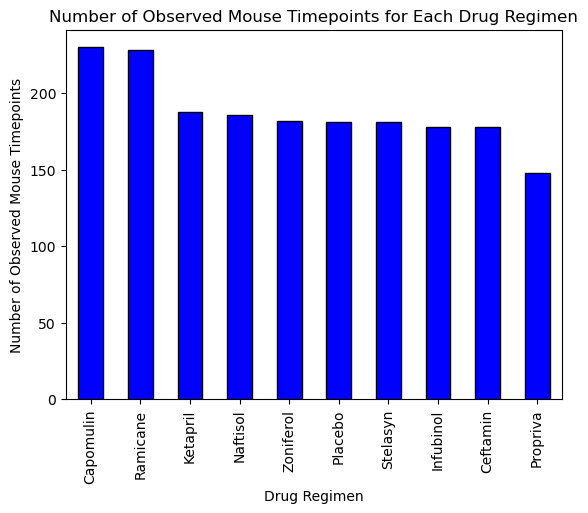

In [9]:

# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

# Count the number of rows for each drug regimen
regimen_counts = merged_data_no_duplicates['Drug Regimen'].value_counts()

# Plot the bar chart
regimen_counts.plot(kind='bar', color='blue', edgecolor='black')

# Set the title and labels
plt.title('Number of Observed Mouse Timepoints for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Observed Mouse Timepoints')

# Display the plot
plt.show()
                    

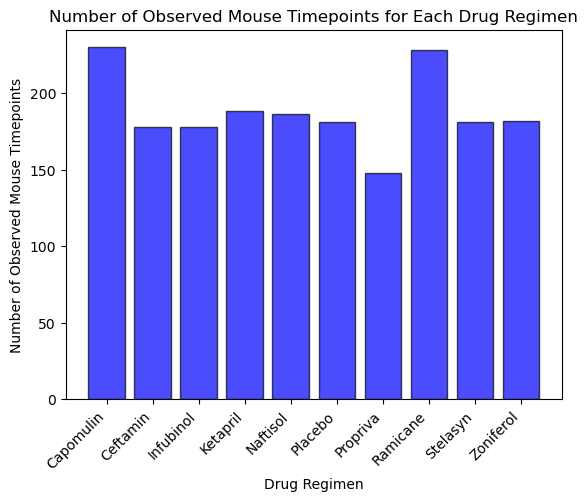

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
# Group by drug regimen and count the number of rows for each regimen
regimen_counts = merged_data_no_duplicates.groupby('Drug Regimen').size()

# Create a bar plot using pyplot
plt.bar(regimen_counts.index, regimen_counts.values, color="blue", edgecolor='black', alpha=0.7)
plt.title("Number of Observed Mouse Timepoints for Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Observed Mouse Timepoints")
plt.xticks(rotation=45, ha="right")
plt.show()

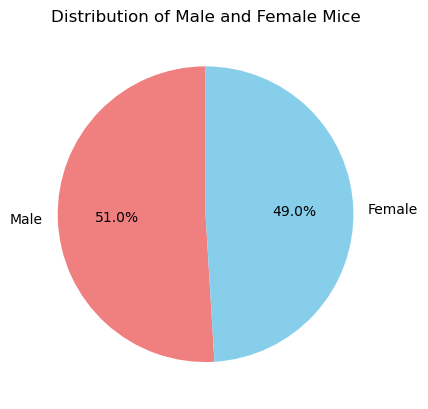

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# Count the number of male and female mice
gender_counts = merged_data_no_duplicates["Sex"].value_counts()

# Plot the pie chart using Pandas
gender_counts.plot.pie(autopct="%1.1f%%", colors=["lightcoral", "skyblue"], startangle=90)
plt.title("Distribution of Male and Female Mice")
plt.ylabel("")  # To remove the default 'Sex' label on the y-axis
plt.show()

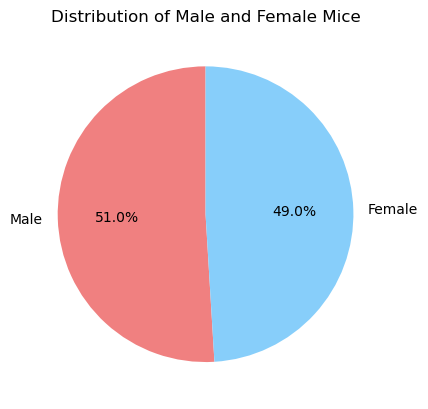

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Count the number of male and female mice
gender_counts = merged_data_no_duplicates["Sex"].value_counts()

# Create a pie chart using pyplot
plt.pie(gender_counts, labels=gender_counts.index, autopct="%1.1f%%", colors=["lightcoral", "lightskyblue"], startangle=90)
plt.title("Distribution of Male and Female Mice")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

In [14]:
# Step 1: Get the last (greatest) timepoint for each mouse
last_timepoints = merged_data_no_duplicates.groupby('Mouse ID')['Timepoint'].max()

# Step 2: Create a DataFrame with the last timepoints
final_tumor_volume = pd.DataFrame(last_timepoints)
print(final_tumor_volume.head())

          Timepoint
Mouse ID           
a203             45
a251             45
a262             45
a275             45
a366             30


In [15]:
# Step 3: Merge with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume = pd.DataFrame(last_timepoints)
merged_df = pd.merge(final_tumor_volume, merged_data_no_duplicates, on=("Mouse ID","Timepoint"),how="left")
merged_df.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


In [16]:
# Step 4: Filter for the specified treatment regimens
specified_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
final_tumor_volume_filtered = merged_df[merged_df['Drug Regimen'].isin(specified_regimens)]
final_tumor_volume_filtered.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
3,a275,45,Ceftamin,Female,20,28,62.999356,3
6,a411,45,Ramicane,Male,3,22,38.407618,1
7,a444,45,Ramicane,Female,10,25,43.047543,0


In [17]:
# Step 1: Put treatments into a list for the loop and later for plot labels
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Step 2: Create an empty list to fill with tumor volume data for plotting
tumor_volume_data = []

In [18]:
# # Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volume_subset = final_tumor_volume_filtered.loc[final_tumor_volume_filtered['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    
    # Add subset to tumor volume data list
    tumor_volume_data.append(tumor_volume_subset)
    
    # Calculate the quartiles and IQR
    quartiles = tumor_volume_subset.quantile([0.25, 0.5, 0.75])
    lower_q = quartiles[0.25]
    upper_q = quartiles[0.75]
    iqr = upper_q - lower_q
    
    # Determine upper and lower bounds for potential outliers
    lower_bound = lower_q - 1.5 * iqr
    upper_bound = upper_q + 1.5 * iqr
    
    # Check for potential outliers
    outliers = tumor_volume_subset.loc[(tumor_volume_subset < lower_bound) | (tumor_volume_subset > upper_bound)]
    
    # Print results
    print(f"Results for {treatment}:")
    print(f" - Interquartile Range (IQR): {iqr:.2f}")
    print(f" - Lower Bound: {lower_bound:.2f}")
    print(f" - Upper Bound: {upper_bound:.2f}")
    print(f" - Potential Outliers: {outliers.tolist()}")
    print("\n")

Results for Capomulin:
 - Interquartile Range (IQR): 7.78
 - Lower Bound: 20.70
 - Upper Bound: 51.83
 - Potential Outliers: []


Results for Ramicane:
 - Interquartile Range (IQR): 9.10
 - Lower Bound: 17.91
 - Upper Bound: 54.31
 - Potential Outliers: []


Results for Infubinol:
 - Interquartile Range (IQR): 11.48
 - Lower Bound: 36.83
 - Upper Bound: 82.74
 - Potential Outliers: [36.3213458]


Results for Ceftamin:
 - Interquartile Range (IQR): 15.58
 - Lower Bound: 25.36
 - Upper Bound: 87.67
 - Potential Outliers: []




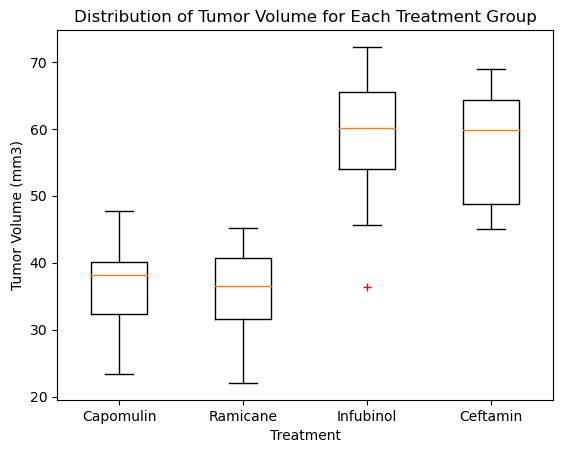

In [19]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

# Create a box plot
plt.boxplot(tumor_volume_data, labels=treatments, sym='r+')

# Set plot labels and title
plt.xlabel('Treatment')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Distribution of Tumor Volume for Each Treatment Group')

# Display the plot
plt.show()

## Line and Scatter Plots

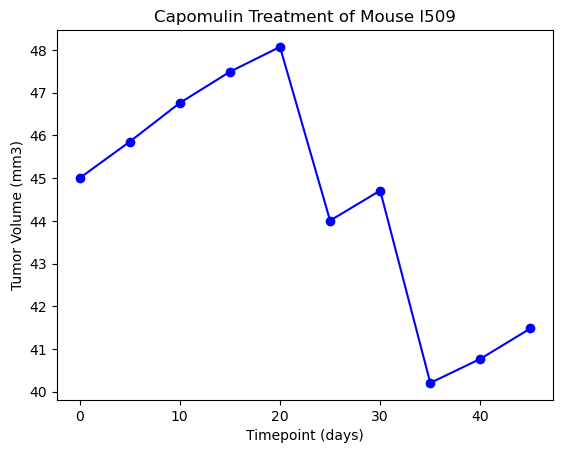

In [20]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Step 1: Choose a specific mouse treated with Capomulin
mouse_id = 'l509'

# Step 2: Filter the data for that mouse and Capomulin treatment
capomulin_data = merged_data_no_duplicates[(merged_data_no_duplicates['Drug Regimen'] == 'Capomulin') & (merged_data_no_duplicates['Mouse ID'] == mouse_id)]

# Step 3: Create a line plot
plt.plot(capomulin_data['Timepoint'], capomulin_data['Tumor Volume (mm3)'], marker='o', color='b')

# Set plot labels and title
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title(f'Capomulin Treatment of Mouse {mouse_id}')

# Display the plot
plt.show()


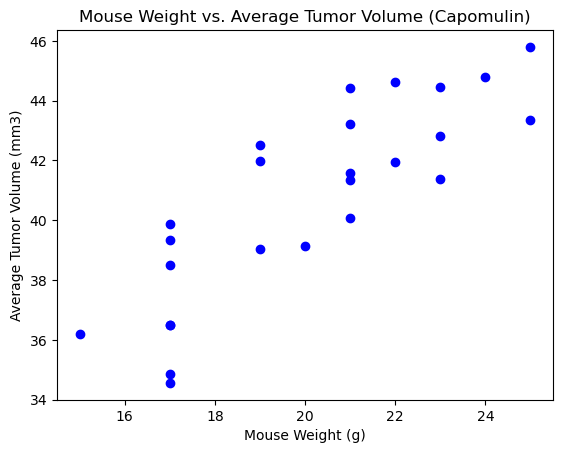

In [23]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# Step 1: Filter the data for the Capomulin regimen
capomulin_data = merged_data_no_duplicates[merged_data_no_duplicates['Drug Regimen'] == 'Capomulin']

# Step 2: Group the data by Mouse ID to calculate average observed tumor volume and weight
average_data = capomulin_data.groupby('Mouse ID').agg(
    Average_Weight=('Weight (g)', 'mean'),
    Average_Tumor_Volume=('Tumor Volume (mm3)', 'mean')
).reset_index()

# Step 3: Create a scatter plot
plt.scatter(average_data['Average_Weight'], average_data['Average_Tumor_Volume'], marker='o', color='b')

# Set plot labels and title
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin)')

# Display the plot
plt.show()


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


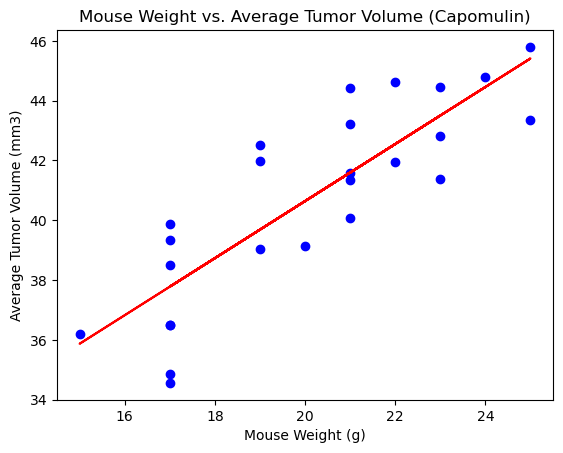

In [22]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Step 1: Filter the data for the Capomulin regimen
capomulin_data = merged_data[merged_data['Drug Regimen'] == 'Capomulin']

# Step 2: Group the data by Mouse ID to calculate average observed tumor volume and weight
average_data = capomulin_data.groupby('Mouse ID').agg(
    Average_Weight=('Weight (g)', 'mean'),
    Average_Tumor_Volume=('Tumor Volume (mm3)', 'mean')
).reset_index()

# Step 3: Calculate the correlation coefficient
correlation_coefficient, _ = st.pearsonr(average_data['Average_Weight'], average_data['Average_Tumor_Volume'])
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation_coefficient, 2)}")

# Step 4: Perform linear regression
slope, intercept, r_value, p_value, std_err = st.linregress(average_data['Average_Weight'], average_data['Average_Tumor_Volume'])

# Step 5: Create a scatter plot with the linear regression line
plt.scatter(average_data['Average_Weight'], average_data['Average_Tumor_Volume'], marker='o', color='b')
plt.plot(average_data['Average_Weight'], slope * average_data['Average_Weight'] + intercept, color='r')

# Set plot labels and title
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin)')

# Display the plot
plt.show()
